
 Einfaches CNN für Fashion-MNIST mit TensorFlow 2.x


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import gzip
from sklearn.utils import shuffle
from tensorflow.keras.models import load_model

In [2]:
# Fashion Klassen
fashion_class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [3]:
# Labels und Daten werden hier geladen
def load_fashion_data():
    
    # Trainingsdaten
    ## Labels (Ausgabe)
    with gzip.open("data/train-labels-idx1-ubyte.gz") as path:
        train_labels = np.frombuffer(path.read(),np.uint8,offset=8)

    ## Bilder (Eingabe)
    with gzip.open("data/train-images-idx3-ubyte.gz") as path:
        train_images = np.frombuffer(path.read(),np.uint8,offset=16).reshape(len(train_labels),28,28)/255.0

    # Testdaten 

    ## Labels (Ausgabe)
    with gzip.open("data/t10k-labels-idx1-ubyte.gz") as path:
        test_labels = np.frombuffer(path.read(),np.uint8,offset=8)

    ## Bilder (Eingabe)
    with gzip.open("data/t10k-images-idx3-ubyte.gz") as path:
        test_images = np.frombuffer(path.read(),np.uint8,offset=16).reshape(len(test_labels),28,28)/255.0

    test_images = np.reshape(test_images,(-1, 28, 28, 1))
    train_images = np.reshape(train_images,(-1, 28, 28, 1))

    seed = 42 
    # Shuffle der Testdaten
    train_images, train_labels = shuffle(train_images, train_labels,random_state=seed)

    # Shuffle der Testdaten
    test_images, test_labels = shuffle(test_images, test_labels,random_state=seed)

    # One Hot Encoding (10 Kategorien)
    train_labels = tf.keras.utils.to_categorical(train_labels,10) 
    test_labels = tf.keras.utils.to_categorical(test_labels,10)

    return train_images, train_labels, test_images, test_labels

In [4]:
# Laden der Daten
train_images, train_labels, test_images, test_labels = load_fashion_data()

In [5]:
def get_test_image(index):
    return np.reshape(test_images[index],(-1,28,28,1))

In [6]:
def show_test_image(index):
    plt.title(fashion_class_labels[np.argmax(test_labels[index])])
    plt.imshow(np.reshape(test_images[index],(28,28)),cmap='Greys')
    plt.show()

In [7]:
def show_dataset():
    plt.figure(figsize=(5,5))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.title(fashion_class_labels[train_labels[i]])
        plt.imshow( np.reshape(train_images[i],(28,28)),cmap='Greys')

    plt.show()

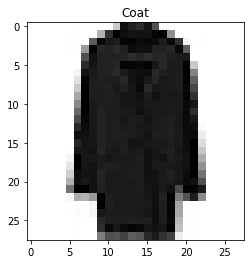

In [8]:
show_test_image(2500)
#show_dataset()

In [9]:
print(test_labels[2500])
#print(test_labels)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [10]:
def fashion_model():

    # Ein einfaches Model 
    model = tf.keras.models.Sequential()

    # Convolutional Layer #1  
    model.add(tf.keras.layers.Conv2D(filters= 32,kernel_size=[5, 5], activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=[2, 2]))

    # Convolutional Layer #2  
    model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=[5, 5], activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=[2, 2]))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    return model

Ohne one_hot encoding:
model.compile(optimizer="adam",loss= tf.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [11]:
model = fashion_model()
model.compile(optimizer="adam",loss= tf.keras.losses.categorical_crossentropy,metrics=["accuracy"])

Mit TensorBoard Visualisierung
tf_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
model.fit(train_images,train_labels,epochs=10,callbacks=[tf_callback])

In [12]:
model.fit(train_images,train_labels,epochs=10,batch_size=32, validation_split=0.1)

Epoch 1/10
 955/1688 [===============>..............] - ETA: 32s - loss: 0.5125 - accuracy: 0.8123

In [ ]:
evaluation_results = model.evaluate(test_images, test_labels)
print(evaluation_results)
print("Loss: {}".format(evaluation_results[0]))
print("Accuracy: {}".format(evaluation_results[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.3578 - accuracy: 0.8911
[0.35783660411834717, 0.8910999894142151]
Loss: 0.35783660411834717
Accuracy: 0.8910999894142151


In [ ]:
# Modell wird gespeichert und neu geladen
model.save("fashion.h5")
fashion_model = load_model("fashion.h5")

In [ ]:
# Laden von Bild 120 und Vorhersage mit keras
predictions = fashion_model.predict(get_test_image(2500))

In [ ]:
# Vorhersage:
print("Gefundene Fashion Kategorie: {}".format(fashion_class_labels[np.argmax(predictions)]))

Gefundene Fashion Kategorie: Coat


In [ ]:
# Alternative schreibweise
'''
model = tf.keras.models.Sequential([    
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(60,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
'''

'\nmodel = tf.keras.models.Sequential([    \n    tf.keras.layers.Flatten(input_shape=(28,28)),\n    tf.keras.layers.Dense(60,activation="relu"),\n    tf.keras.layers.Dense(20,activation="relu"),\n    tf.keras.layers.Dense(10, activation="softmax")\n])\n'